✅ Meilleurs paramètres : {'logreg__C': 0.01, 'logreg__penalty': 'l1'}

🎯 Rapport de classification (seuil = 0.3):
              precision    recall  f1-score   support

           0      0.816     0.293     0.431       851
           1      0.134     0.624     0.220       149

    accuracy                          0.342      1000
   macro avg      0.475     0.458     0.326      1000
weighted avg      0.715     0.342     0.399      1000



C:\Users\kabey\AppData\Local\Temp\ipykernel_19548\2852210755.py:52: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\kabey\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


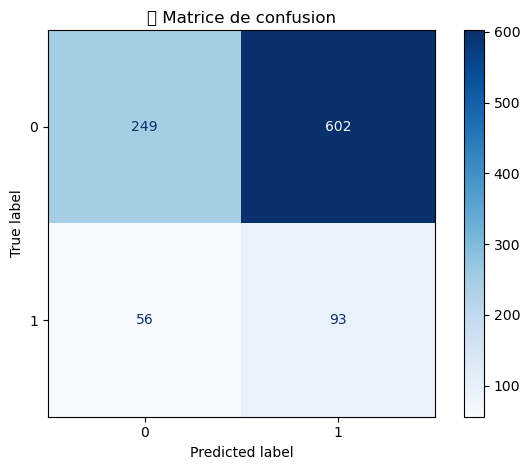

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_recall_curve, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import matplotlib.pyplot as plt
import seaborn as sns
# --- 1. Charger le dataset ---
df = pd.read_csv('decrochage_scolaire_clean.csv')
# --- 2. Préparation des données ---
target = 'risque'
X = df.drop(['id', target], axis=1)
y = df[target]
# Encodage des variables catégorielles
# ...existing code...
X = pd.get_dummies(X, columns=['genre', 'department'], drop_first=True)
# ...existing code...
# --- 3. Split train/test avec stratification ---
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
# --- 4. Pipeline avec SMOTE + Standardisation + Modèle ---
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced'))
])
# --- 5. GridSearchCV ---
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10],
    'logreg__penalty': ['l1', 'l2']
}
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
# --- 6. Évaluation du modèle ---
print("✅ Meilleurs paramètres :", grid_search.best_params_)
y_proba = grid_search.predict_proba(X_test)[:, 1]
seuil = 0.3
y_pred = (y_proba >= seuil).astype(int)
print(f"\n🎯 Rapport de classification (seuil = {seuil}):")
print(classification_report(y_test, y_pred, digits=3))
# --- 7. Matrice de confusion ---
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', values_format='d')
plt.title("📌 Matrice de confusion")
plt.tight_layout()
plt.show()